In [229]:
import numpy as np
import pandas as pd
from datetime import datetime
import glob
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
# Lectura de los archivos .csv y concatenarlos en un solo dataframe

all_files = glob.glob("*.csv")

li = []

for filename in all_files:

    df = pd.read_csv(filename, index_col=[0], parse_dates=True)

    li.append(df)

frame = pd.concat(li, ignore_index=False) 

In [173]:
frame

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,10,147.2
2010-01-01 01:30:00,10,147.1
2010-01-01 01:45:00,10,148.9
2010-01-01 02:00:00,10,143.3
2010-01-01 02:15:00,9,143.3
...,...,...
2010-12-30 23:00:00,67,333.7
2010-12-30 23:15:00,68,221.0
2010-12-30 23:30:00,68,235.7


In [100]:
all_files #Archivos que se usarán

['building4retail.csv',
 'building1retail.csv',
 'building3retail.csv',
 'building2retail.csv',
 'building5retail.csv']

In [91]:
frame.shape

(174700, 2)

### Exploratory Data Analysis

(-50.0, 600.0)

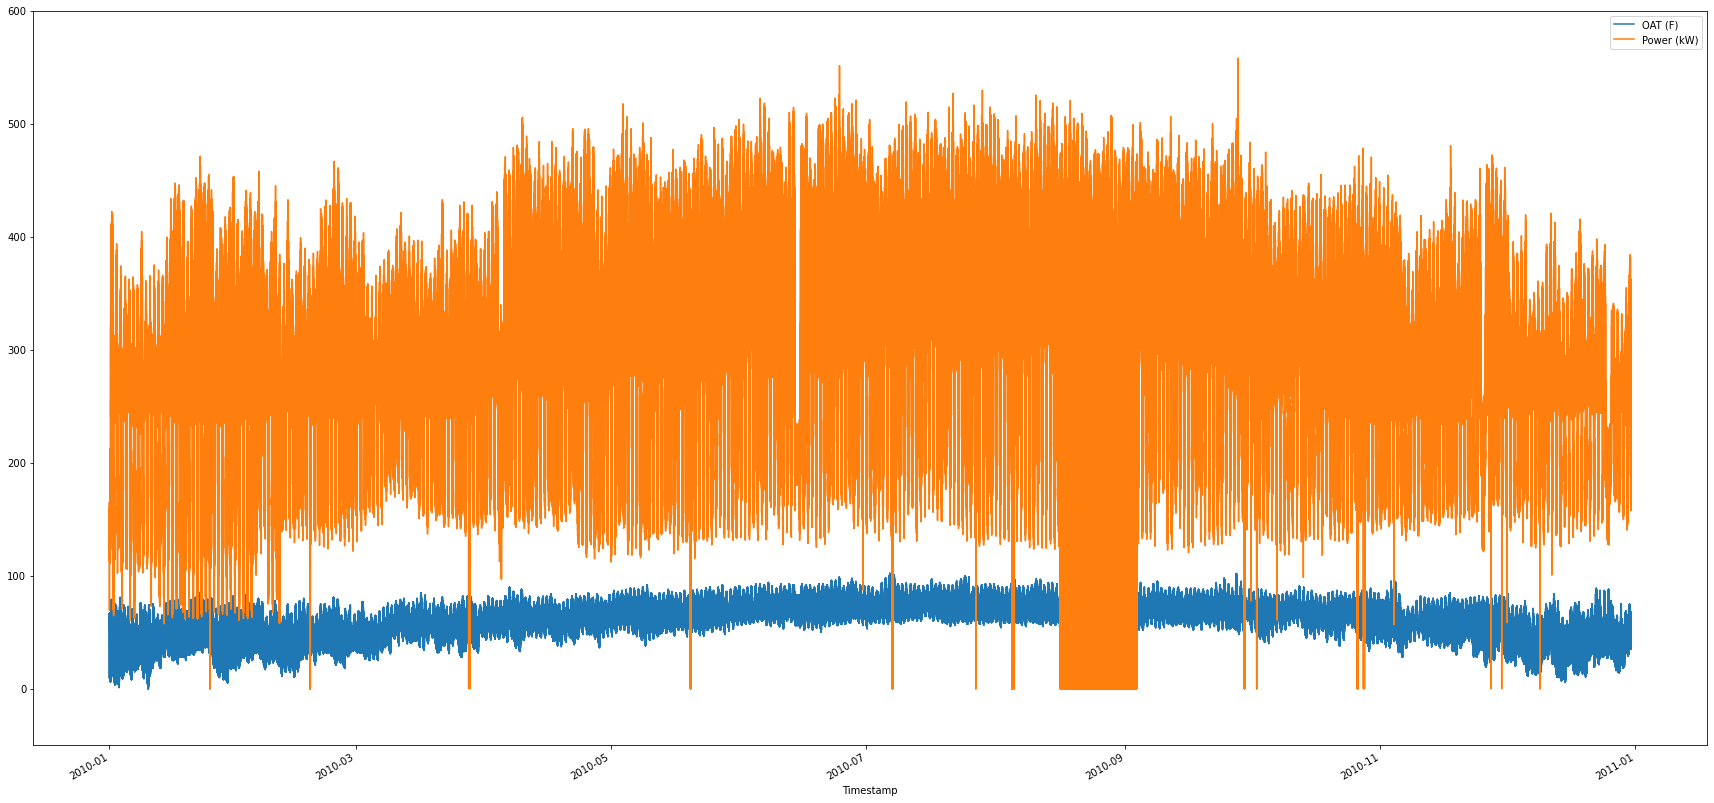

In [84]:
frame.plot(figsize=(30,15))
plt.ylim(-50,600)

Hay que notar que a finales de 2010-08 y principios de 2010-09, hay muchos valores de 0 de $Power kW$, quizás algún edificio (o varios) tuvo daños de energía seguidos por esos días y debido a eso se registró valor.

Los valores de 0 en $Power kW$ que están en algunas fechas, pueden atribuirse a daños de energía en algún edicio en un día aleatorio.

In [63]:
frame.isnull().values.any()
# Como la salida es False, significa que no hay ningún valor nulo, osea que no falta algún dato

False

In [126]:
# Otra forma de checkear si faltan valores y cuántos
frame.isnull().sum()

OAT (F)       0
Power (kW)    0
dtype: int64

array([[<AxesSubplot:title={'center':'OAT (F)'}>,
        <AxesSubplot:title={'center':'Power (kW)'}>]], dtype=object)

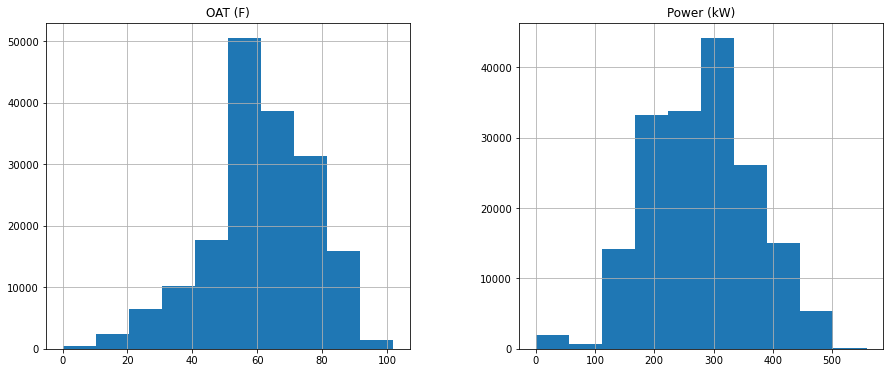

In [76]:
# hitograma del dataframe
frame.hist(figsize=(15,6))

Se puede notar que tiene un comportamiento similar al ejemplo realizado en clase, pero el eje de frecuencias llega hasta un número más alto. En este caso hasta alrededor de 50000 y 40000. También se puede notar que en el histograma de Power (kW) el bin de 0-50 es más grande que en el ejemplo realizado en clase, como se discutió arriba, se ve reflejado en la zona dicha donde hay varios valores de 0 seguidos.

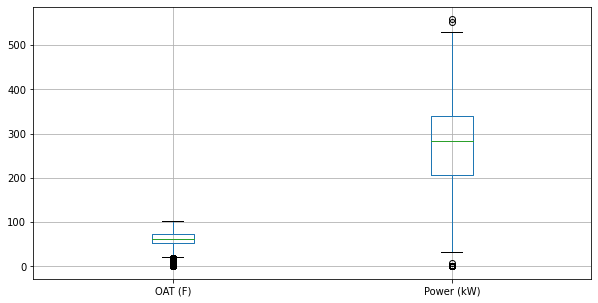

In [77]:
# Grafica tipo "vela"
frame.plot(kind='box', figsize=(10,5))
plt.grid()

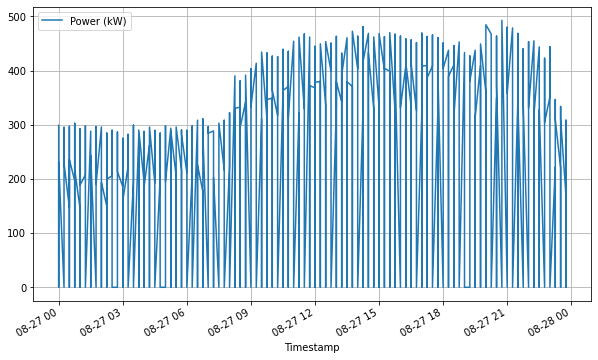

In [109]:
# Este es un ejemplo de una fecha en donde está la zona de 0 en Power (kW)
frame.loc['2010-08-27', ['Power (kW)']].plot(figsize=(10,6))
plt.grid()

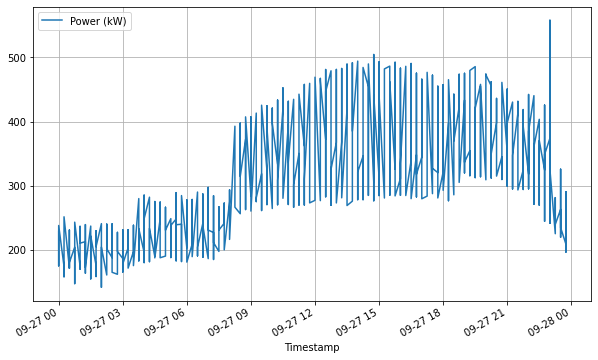

In [108]:
# Ejemplo de Power (kW) en otra zona fuera de la que se ven muchos ceros
frame.loc['2010-09-27', ['Power (kW)']].plot(figsize=(10,6))
plt.grid()

In [150]:
# Descripción útil de la columna
frame['Power (kW)'].describe()

count    174700.000000
mean        279.818650
std          89.332393
min           0.000000
25%         207.300000
50%         283.100000
75%         340.125000
max         558.100000
Name: Power (kW), dtype: float64

In [151]:
# Descripción útil de las columnas
frame['OAT (F)'].describe()

count    174700.000000
mean         61.027934
std          16.250278
min           0.000000
25%          52.000000
50%          61.000000
75%          73.000000
max         102.000000
Name: OAT (F), dtype: float64

In [190]:
# Limpiar el dataframe para solo tomar valores dentro de 2 sigma

std_dev = 1
outliers = (np.abs(stats.zscore(frame)) < std_dev).any(axis=1)
df_lim = frame[ outliers]
df_lim

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 08:15:00,6,282.6
2010-01-01 08:30:00,6,278.8
2010-01-01 08:45:00,6,278.6
2010-01-01 09:00:00,6,277.5
2010-01-01 09:15:00,7,283.8
...,...,...
2010-12-30 23:00:00,67,333.7
2010-12-30 23:15:00,68,221.0
2010-12-30 23:30:00,68,235.7


In [191]:
df_lim.shape

(146523, 2)

(-50.0, 600.0)

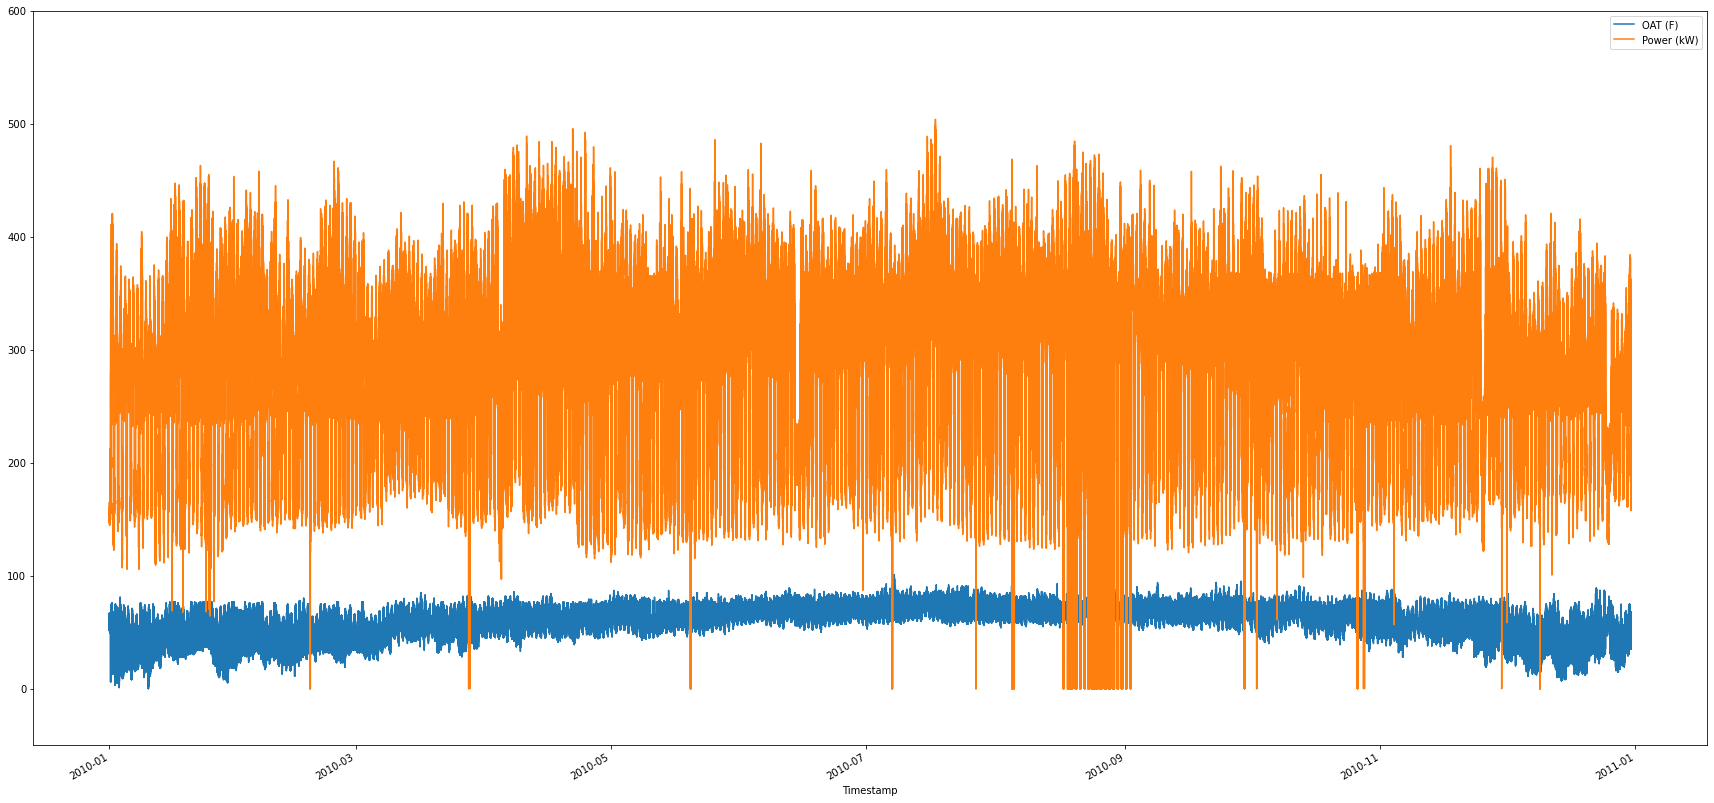

In [192]:
# Grafica del dataframe limpio
df_lim.plot(figsize=(30,15))
plt.ylim(-50,600)

Se utilizó la misma forma de limpieza vista en clase cogiendo los datos dentro de una desviación estándar. 

Se intentó remover o reemplazar por valores que no afecten la distribución de los datos donde los donde Power (kW) era cero, pero no se logró.

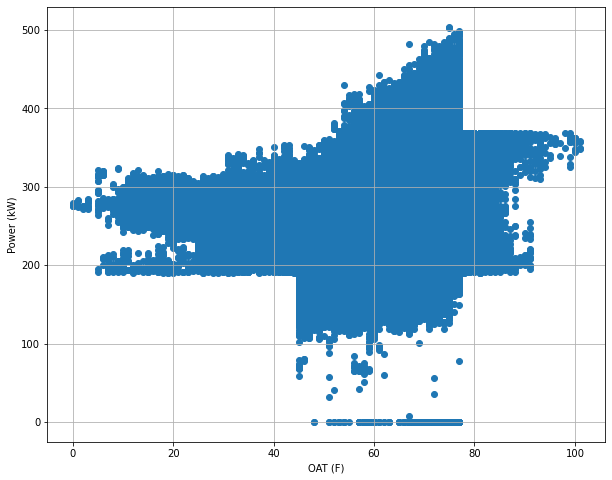

In [198]:
# Se continúa un poco con el análisis exploratorio del dataframe limpio

plt.figure(figsize=(10,8))
plt.scatter(df_lim['OAT (F)'], df_lim['Power (kW)'])
plt.xlabel('OAT (F)')
plt.ylabel('Power (kW)')
plt.grid()

In [203]:
df_lim[['OAT (F)','Power (kW)']].corr()

,OAT (F),Power (kW)
OAT (F),1.000000,0.276229
Power (kW),0.276229,1.000000


Los datos están muy poco correlacionados.

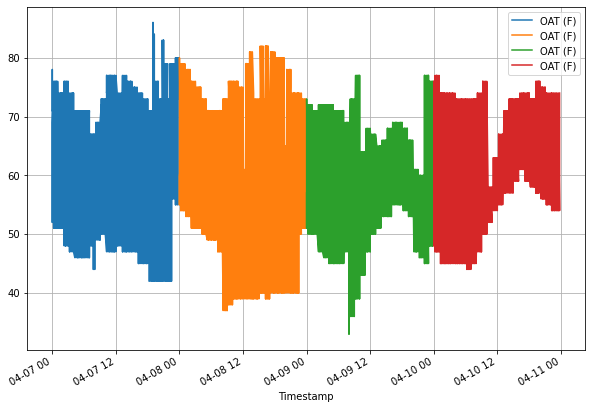

In [205]:
fig, ax = plt.subplots(figsize=(10,7))
df_lim.loc['2010-04-07', ['OAT (F)']].plot(ax=ax)
df_lim.loc['2010-04-08', ['OAT (F)']].plot(ax=ax)
df_lim.loc['2010-04-09', ['OAT (F)']].plot(ax=ax)
df_lim.loc['2010-04-10', ['OAT (F)']].plot(ax=ax)
plt.grid()

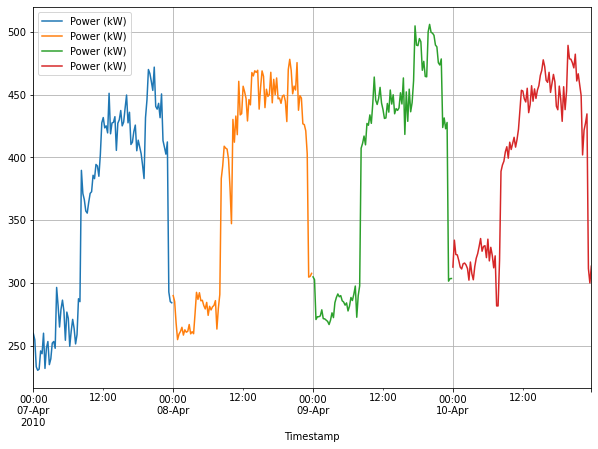

In [207]:
fig, ax = plt.subplots(figsize=(10,7))
df.loc['2010-04-07', ['Power (kW)']].plot(ax=ax)
df.loc['2010-04-08', ['Power (kW)']].plot(ax=ax)
df.loc['2010-04-09', ['Power (kW)']].plot(ax=ax)
df.loc['2010-04-10', ['Power (kW)']].plot(ax=ax)
plt.grid()

In [210]:
# Media del Power (kW) respecto a cada temperatura
df_lim.groupby('OAT (F)')['Power (kW)'].mean()

OAT (F)
0      276.375000
1      278.625000
2      273.725000
3      278.787500
5      284.304545
          ...    
97     347.450000
98     358.600000
99     353.372727
100    354.737500
101    353.075000
Name: Power (kW), Length: 101, dtype: float64

## Regresión Lineal

In [223]:
X = pd.DataFrame(df_lim['OAT (F)'])
y = pd.DataFrame(df_lim['Power (kW)'])

linear_regression = LinearRegression()
linear_regression.fit(X,y)

LinearRegression()

In [224]:
# Coeficiente de la regresión lineal
linear_regression.coef_

array([[1.48096476]])

In [225]:
# Intercepto de la regresión lineal
linear_regression.intercept_

array([182.98652867])

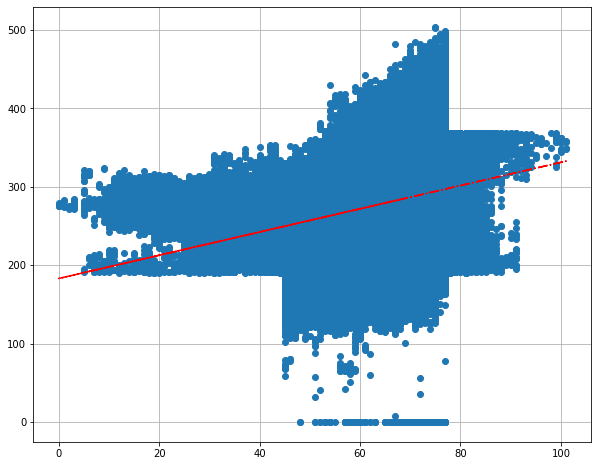

In [226]:
y_pred = linear_regression.intercept_[0] + linear_regression.coef_[0][0] * X.values.flatten()

plt.figure(figsize=(10,8))
# dibujar los datos
plt.plot(X.values.flatten(),y.values.flatten(),'o')
# dibujar recta estimada
plt.plot(X.values.flatten(), y_pred, '-.r')
plt.grid()

No parece ser un buen ajuste, miremos el $r^2$

In [227]:
linear_regression.score(X,y)

0.07630268275538477

$r^2 = 0.07630268275538477$

Lo que no parece ser un buen ajuste. Miremos usando datos de entrenamiento.

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.07858035135788277

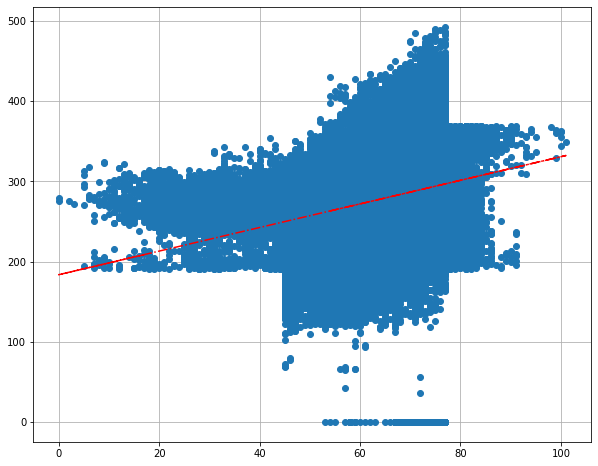

In [236]:
# Graficando de nuevo pero usando el modelo entrenado.

y_pred = linear_regression.intercept_[0] + linear_regression.coef_[0][0] * X_test.values.flatten()

plt.figure(figsize=(10,8))
# dibujar los datos
plt.plot(X_test.values.flatten(),y_test.values.flatten(),'o')
# dibujar recta estimada
plt.plot(X_test.values.flatten(), y_pred, '-.r')
plt.grid()

In [ ]:
df_lim['hour']=df_lim.index.hour

In [244]:
# Agregando la hora a ver si mejora el modelo

X = pd.DataFrame(df_lim[['OAT (F)','hour']])
y = pd.DataFrame(df_lim['Power (kW)'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression()

In [245]:
linear_regression.coef_

array([[1.535825  , 5.88314263]])

In [246]:
linear_regression.intercept_

array([112.83561057])

In [247]:
linear_regression.score(X_test,y_test)

0.4135512687430387

Se puede notar que el $r^2$ aumentó apreciablemente al incluir la hora como nuevo predictor

In [ ]:
df_lim['month']=df_lim.index.month
df_lim['minute']=df_lim.index.minute


In [250]:
df_lim

,OAT (F),Power (kW),hour,month,minute
Timestamp,,,,,
2010-01-01 08:15:00,6,282.6,8,1,15
2010-01-01 08:30:00,6,278.8,8,1,30
2010-01-01 08:45:00,6,278.6,8,1,45
2010-01-01 09:00:00,6,277.5,9,1,0
2010-01-01 09:15:00,7,283.8,9,1,15
...,...,...,...,...,...
2010-12-30 23:00:00,67,333.7,23,12,0
2010-12-30 23:15:00,68,221.0,23,12,15
2010-12-30 23:30:00,68,235.7,23,12,30


Agregando los minutos y el mes como nuevos predictores.

In [251]:
X = pd.DataFrame(df_lim[['OAT (F)','hour','month','minute']])
y = pd.DataFrame(df_lim['Power (kW)'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression()

In [254]:
linear_regression.score(X_test,y_test)

0.41364535261369284

No aumentó el $r^2$, significa que estos predictores nuevos no tienen mucho impacto en el modelo.

In [258]:
df_lim = df_lim.drop(columns=['minute','month'])

In [259]:
# una característica cualitativa relacionada con el estado de las tiendas: abierto o cerrado.
df_lim['open_hours'] = np.where((df_lim.index.hour >= 9) & (df_lim.index.hour <= 21),1,0)

In [260]:
df_lim.sample(5)

,OAT (F),Power (kW),hour,open_hours
Timestamp,,,,
2010-10-11 09:30:00,77,358.9,9,1
2010-11-20 21:15:00,51,303.6,21,1
2010-02-13 05:00:00,48,192.3,5,0
2010-08-29 06:30:00,71,0.0,6,0
2010-05-31 21:30:00,62,362.3,21,1


In [263]:
X = pd.DataFrame(df_lim[['OAT (F)','hour','open_hours']])
y = pd.DataFrame(df_lim['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.5446176124472836

El $r^2$ aumentó a 0.5446176124472836. Lo cual e sun aumento significativo. Quiere decir que el horario de apertura de las tiendas tiene relevancia en este modelo

<AxesSubplot:xlabel='Timestamp'>

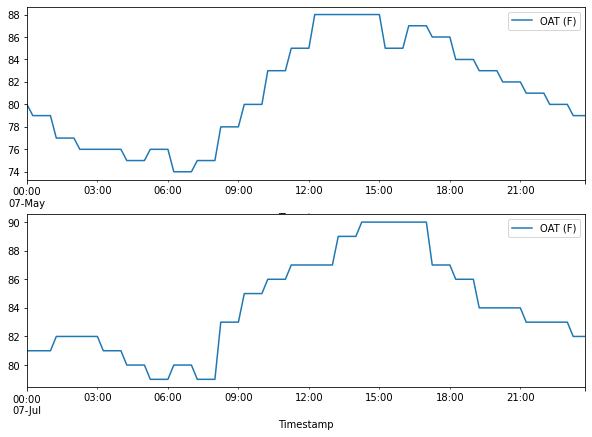

In [271]:
fig, axs = plt.subplots(2)
df.loc['2010-05-07', ['OAT (F)']].plot(ax=axs[0],figsize=(10,7))
df.loc['2010-07-07', ['OAT (F)']].plot(ax=axs[1])

Se puede notar que efectivamente hay una relación entre la hora del día y la temperatura registra, donde la temperatura registrada aumenta apreciablemente a partir de las 7:00 u 8:00 de la mañana. 

Esto debido al horario de invierno o verano, dependiente de la fuente de los datos.


**Modelo final con los predictores aumentados**

In [272]:
df_lim['month']=df_lim.index.month
df_lim['minute']=df_lim.index.minute


In [273]:
df_lim.sample(10)

,OAT (F),Power (kW),hour,open_hours,month,minute
Timestamp,,,,,,
2010-10-23 08:30:00,44,256.1,8,0,10,30
2010-11-08 06:00:00,50,178.4,6,0,11,0
2010-07-11 23:30:00,62,182.9,23,0,7,30
2010-05-05 03:30:00,64,171.5,3,0,5,30
2010-02-19 20:00:00,53,283.5,20,1,2,0
2010-02-04 22:00:00,53,282.5,22,0,2,0
2010-05-06 22:30:00,49,203.6,22,0,5,30
2010-08-13 09:30:00,74,319.4,9,1,8,30
2010-06-06 23:15:00,73,182.6,23,0,6,15


In [274]:
X = pd.DataFrame(df_lim[['OAT (F)','hour','open_hours','month','minute']])
y = pd.DataFrame(df_lim['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.5446200658859452

Se obtiene un $r^2 = 0.5446200658859452$. Donde inicialmente se tenía $r^2 = 0.07630268275538477$

Se puede notar un aumento significativo de la calidad del modelo, donde los predictores más significativos fueron 'hour' y 'open_hours', los cuales aumentaron de manera notable el $r^2$.